In [1]:
#Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

#EDA Tools
import pandas as pd
import numpy as np
from numpy import interp

#Machine learning tools dan preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Matrix Validation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,plot_roc_curve,precision_score,recall_score,mean_squared_error,roc_curve,auc
from sklearn.model_selection import cross_val_score
#Hypertuning Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Other tools
from collections import Counter


In [2]:
df = pd.read_csv('dataset/wine_quality.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Bad


In [3]:
y = df['quality']
X = df.drop(['quality'], axis=1)

In [4]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)
print(sorted(Counter(y_train).items()))

In [8]:
model_pertama = SVC(kernel='rbf',random_state = 0)
model_pertama.fit(X_train, y_train)

SVC(random_state=0)

In [9]:
predict_model_pertama = model_pertama.predict(X_test)
acc = accuracy_score(y_test, predict_model_pertama)
precs = precision_score(y_test,predict_model_pertama)
recal = recall_score(y_test,predict_model_pertama)


print(classification_report(y_test, predict_model_pertama))
print("Accuracy = %.3f"  %acc)
print("Precision = %.2f" %precs)
print("Recall = %.2f " %recal)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       290
           1       0.64      0.30      0.41        30

    accuracy                           0.92       320
   macro avg       0.79      0.64      0.68       320
weighted avg       0.90      0.92      0.91       320

Accuracy = 0.919
Precision = 0.64
Recall = 0.30 


<AxesSubplot:>

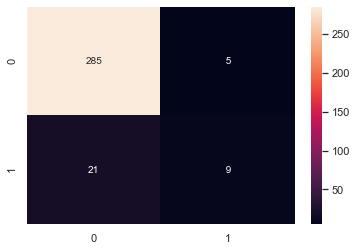

In [10]:
cm = confusion_matrix(y_test, predict_model_pertama)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [13]:
accuracies = cross_val_score(estimator = model_pertama, X = X_train, y = y_train, cv = 10)
print("Total Akurasi validasi 10 kali = ", accuracies)
print("Rata-rata akurasi = ", accuracies.mean())

Total Akurasi validasi 10 kali =  [0.875      0.85833333 0.875      0.875      0.83333333 0.89166667
 0.9        0.89166667 0.9        0.86554622]
Rata-rata akurasi =  0.8765546218487396


In [14]:
rms = mean_squared_error(y_test,predict_model_pertama, squared=False)
print('RMSE = %.3f' %rms )

RMSE = 0.300


In [21]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predict_model_pertama)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, predict_model_pertama))

roc_auc_score for SVM:  0.8150234741784037


In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_search = GridSearchCV(estimator = model_pertama,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
print("Best akurasi = ",best_accuracy)
print("Best paraneter = ",best_parameters)

In [32]:
clf = SVC(C=1, gamma=0.5, kernel ="rbf")
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

In [33]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precs = precision_score(y_test,y_pred)
recal = recall_score(y_test,y_pred)


print(classification_report(y_test, y_pred))
print("Accuracy = %.3f"  %acc)
print("Precision = %.2f" %precs)
print("Recall = %.2f " %recal)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       355
           1       0.77      0.51      0.61        45

    accuracy                           0.93       400
   macro avg       0.85      0.75      0.79       400
weighted avg       0.92      0.93      0.92       400

Accuracy = 0.927
Precision = 0.77
Recall = 0.51 


In [34]:
accuracies2 = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Total Akurasi validasi 10 kali = ", accuracies2)
print("Rata-rata akurasi = ", accuracies2.mean())

Total Akurasi validasi 10 kali =  [0.86666667 0.85833333 0.89166667 0.85833333 0.88333333 0.89166667
 0.88333333 0.875      0.90833333 0.91596639]
Rata-rata akurasi =  0.8832633053221288


In [29]:
clf = SVC(C=10,gamma=0.5,probability=True) 
clf.fit(X_train,y_train)
y_score_test = clf.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score_test)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score_test))

roc_auc_score for SVM:  0.8969014084507043


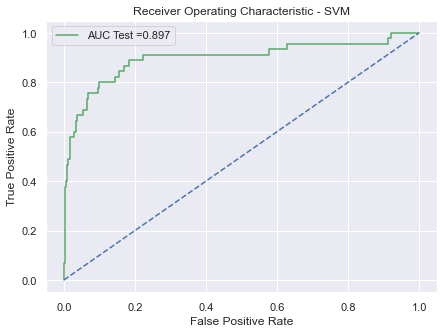

In [30]:
plt.subplots(1, figsize=(7,5))

curve = roc_auc_score(y_test,y_score_test)

plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1, c='g', label="AUC Test =%.3f" %curve)
plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c="r"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

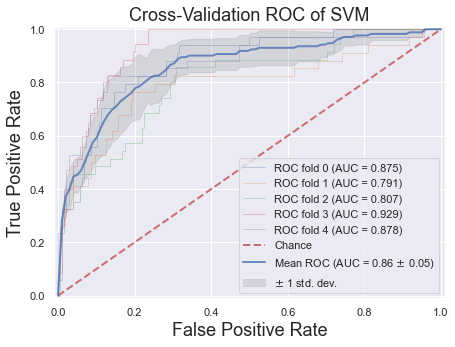

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

classifier = SVC(kernel='rbf',probability=True,random_state=0, C = 10, gamma=0.5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(7,5))
i = 0
for train, test in cv.split(X_train, y_train):
    probabilities = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probabilities[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of SVM',fontsize=18)
plt.legend(loc="best")
plt.show()